In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from statistics import mean

# Problem 1

### Generate Demand Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC8EA285F8>]],
      dtype=object)

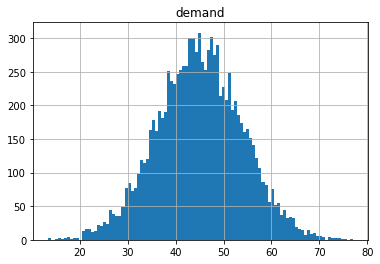

In [204]:
demand = pd.DataFrame(np.random.normal(45,9,size=10000), columns=['demand'])
demand.hist(bins=100)

#### Problem 1a

In [202]:
# overage cost / unit
c_o = 0.3
# underage cost / unit
c_u = 0.54

In [203]:
def cost_equation(Q):
    overage_cost = c_o*(Q-demand).clip(lower=0).mean()[0]
    underage_cost = c_u*(demand-Q).clip(lower=0).mean()[0]
    return overage_cost + underage_cost

48

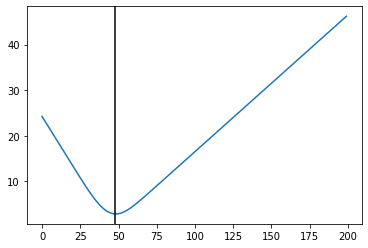

In [43]:
# -- Code modified from lecture demo
maxq = 200
# Calculate where the cost is minimized via complete enumeration
q_list = range(maxq)
cost_list = [cost_equation(q) for q in q_list]
qstar = q_list[np.where(cost_list == np.min(cost_list))[0][0]]

plt.plot(q_list,cost_list)
plt.axvline(qstar,color='black')
qstar

The optimal number of bagels to order each day is 48 bagels.

#### Problem 1b

In [205]:
#Expected daily cost assuming that he orders the optimal quantity of 48 bagels
cost_equation(48)

2.7860602317967436

When ordering 48 bagels each day, the total expected daily cost is $2.78

In [47]:
np.random.normal(45,9,size=1)[0]

56.3264020193128

In [76]:
#annual overage and underage cost
annual_underage=[]
annual_overage=[]
for i in range(180): #each day in a year
    random_demand = np.random.normal(45,9,size=1)[0]
    u = c_u*(random_demand-48)
    o = c_o*(48-random_demand)
    if u > 0:
        annual_underage.append(u)
    else:
        annual_underage.append(0)
    if o > 0:
        annual_overage.append(o)
    else:
        annual_overage.append(0)

In [77]:
print(sum(annual_overage), sum(annual_underage), sum(annual_overage)+ sum(annual_underage))

275.1283300285481 200.6345847503288 475.76291477887685


Annual overage cost is roughly $312.77

Annual underage cost is roughly $205.35

Expected annual cost is roughly $475.76


#### Problem 1c

In [86]:
#annual overage and underage cost
annual_underage2=[]
annual_overage2=[]
for i in range(180): #each day in a year
    random_demand2 = np.random.normal(45,9,size=1)[0]
    u2 = c_u*(random_demand2-63)
    o2 = c_o*(63-random_demand2)
    if u2 > 0:
        annual_underage2.append(u2)
    else:
        annual_underage2.append(0)
    if o2 > 0:
        annual_overage2.append(o2)
    else:
        annual_overage2.append(0)

In [87]:
print(sum(annual_overage2), sum(annual_underage2), sum(annual_overage2)+ sum(annual_underage2))

1008.3848010152956 2.4411856032952315 1010.8259866185908


In [89]:
print((sum(annual_overage2)+ sum(annual_underage2))-(sum(annual_overage)+ sum(annual_underage)))

535.063071839714


Annual overage cost is roughly $1008.38

Annual underage cost is roughly $2.44

Expected annual cost is roughly $1010.83

Additional cost of Rex's decision is about $535.06

# Problem 2

In [91]:
import sqlite3 as sq
import os

In [93]:
# Double check that Wildfires.sqlite has been uploaded to colab
assert(os.path.isfile('Newsvendor.sqlite'))
# Connecting to Wildfires database
conn = sq.connect('Newsvendor.sqlite')

In [94]:
conn

In [98]:
pd.read_sql_query("SELECT * FROM Demand", conn).head()

,D
0,1
1,9
2,15
3,2
4,0


In [99]:
pd.read_sql_query("SELECT * FROM WholeNumbers", conn).head()

,N
0,0
1,1
2,2
3,3
4,4


#### Problem 2a

In [100]:
pd.read_sql_query("SELECT(SUM(CASE WHEN d<=5 THEN 1 ELSE 0 END)* 1.0/COUNT(*)) AS probability FROM demand", conn)

,probability
0,0.317073


I calculated the probability that D<= 5 by summing the records where D<= 5 in the table demand. Then, I converted this number into a float, or the type equivalent in SQL and divided it by the total number of records in the demand table to calculate the probability. 

#### Problem 2b

In [141]:
#pd.read_sql_query("CREATE VIEW Q01 AS SELECT N, COUNT(D) AS NumRecordsWithDLessThanOrEqualToN FROM Demand, WholeNumbers WHERE D<=N GROUP BY N", conn)
pd.read_sql_query("SELECT * FROM Q01", conn)
#pd.read_sql_query("DROP VIEW Q01", conn)

,N,NumRecordsWithDLessThanOrEqualToN
0,0,16
1,1,31
2,2,44
3,3,53
4,4,70
5,5,78
6,6,97
7,7,108
8,8,118
9,9,134


#### Problem 2c

To complete this problem, I calculated the total number of records in the demand table, which equals 246 and which I hard 
coded into the below query

In [167]:
#pd.read_sql_query("CREATE VIEW Q02 AS SELECT Q01.N, Q01.NumRecordsWithDLessThanOrEqualToN FROM Q01, Demand WHERE (Q01.NumRecordsWithDLessThanOrEqualToN*1.0/246) >= 0.5 GROUP BY N",conn)
pd.read_sql_query("SELECT * FROM Q02",conn)
#pd.read_sql_query("DROP VIEW Q02",conn)

,N,NumRecordsWithDLessThanOrEqualToN
0,9,134
1,10,146
2,11,157
3,12,173
4,13,182
5,14,192
6,15,211
7,16,216
8,17,229
9,18,238


#### Problem 2d

In [170]:
#pd.read_sql_query("CREATE VIEW Q03 AS SELECT MIN(N) AS N, NumRecordsWithDLessThanOrEqualToN FROM Q02",conn)
pd.read_sql_query("SELECT * FROM Q03",conn)
#pd.read_sql_query("DROP VIEW Q03",conn)

,N,NumRecordsWithDLessThanOrEqualToN
0,9,134


#### Problem 2e

In [171]:
pd.read_sql_query("SELECT N, count(D) AS NumRecordsWithDLessThanOrEqualToN FROM Demand, WholeNumbers WHERE D<=N GROUP BY N HAVING NumRecordsWithDLessThanOrEqualToN>=(0.4*246) ORDER BY N ASC LIMIT 1",conn)

,N,NumRecordsWithDLessThanOrEqualToN
0,7,108


# Problem 3

In [176]:
eggs = pd.read_csv('foodcart.csv')
eggs.head()

,Unnamed: 0,prob_rain,demand
0,0,0.250940,73
1,1,0.420737,70
2,2,0.224878,82
3,3,0.520656,69
4,4,0.858490,25


#### Problem 3a

In [197]:
c_o2 = 0.75 #costs of one thrown out sandwich (un_used inventory)
c_u2 = 3 #loss in profit from not having the supply to meet demand
demand2 = pd.DataFrame(eggs['demand'])

In [198]:
def cost_equation2(Q):
    overage_cost = c_o2*(Q-demand2).clip(lower=0).mean()[0]
    underage_cost = c_u2*(demand2-Q).clip(lower=0).mean()[0]
    return overage_cost + underage_cost

88

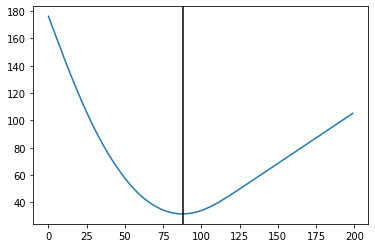

In [199]:
# Calculate where the cost is minimized via complete enumeration
q_list2 = range(200)
cost_list2 = [cost_equation2(q) for q in q_list2]
qstar2 = q_list2[np.where(cost_list2 == np.min(cost_list2))[0][0]]

plt.plot(q_list2,cost_list2)
plt.axvline(qstar2,color='black')
qstar2

In [200]:
cost_equation2(88)

31.478250000000003

In [206]:
np.array(cost_list2).mean()

71.4773625

The average cost on this data for q's over the range 0 - 200 is ~ $71.48

The average cost for a day assuming that he makes the optimal quantity of eggs (88) is $31.48

#### Problem 3b

In [210]:
data= pd.DataFrame()
data['A']=np.random.uniform(0,150,1000) #given in the problem
data['B']=np.random.uniform(-150,0,1000) #given in the problem
data['Num Eggs']= 3*round(data['A']+data['B']*eggs['prob_rain'])

In [211]:
data.head()

,A,B,Num Eggs
0,39.857933,-60.500638,75.0
1,2.919210,-140.346680,-168.0
2,31.883364,-51.996306,60.0
3,25.926400,-99.207181,-78.0
4,17.781578,-28.863592,-21.0


In [213]:
for index,row in data.iterrows():
    data.loc[index,'cost']=cost_equation2(row['Num Eggs'])
data.head()

,A,B,Num Eggs,cost
0,39.857933,-60.500638,75.0,34.3170
1,2.919210,-140.346680,-168.0,680.2920
2,31.883364,-51.996306,60.0,45.2595
3,25.926400,-99.207181,-78.0,410.2920
4,17.781578,-28.863592,-21.0,239.2920


In [214]:
data[data['cost']==min(data['cost'])]

,A,B,Num Eggs,cost
43,50.920980,-40.963755,87.0,31.49325
58,97.999407,-72.701950,87.0,31.49325
183,89.028550,-84.029426,87.0,31.49325
278,39.405623,-63.629940,87.0,31.49325
571,54.820601,-146.376909,87.0,31.49325
641,41.045975,-65.727623,87.0,31.49325
661,41.811953,-104.114916,87.0,31.49325
809,29.038069,-3.744031,87.0,31.49325
838,43.422761,-32.124160,87.0,31.49325


Using this method, we can see that there are several values of A and B that minimize the expected cost at $31.49, each reccomending that 87 eggs should be scrambled every day. This method is in line with the notion that the reccomended quantity of eggs should be a multiple of 3, as 87/3=29

# Problem 4

In [222]:
beta_1 = np.random.normal(0.25,0.05, 10000)
beta_2 = np.random.normal(0.2, 0.01, 10000)
gamma = 0.1 #fixed parameter
probability = np.arange(0,1.01, 0.01)

In [223]:
probability

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [225]:
avg_infections1 = np.zeros(len(probability))
avg_infections2 = np.zeros(len(probability))

for i in range(len(probability)):
    x = [5000*max(0,1-(gamma+probability[i])/b1) for b1 in beta_1]
    y = [5000*max(0,1-(gamma+probability[i])/b2) for b2 in beta_2]
    avg_infections1[i]=mean(x)
    avg_infections2[i]=mean(y)

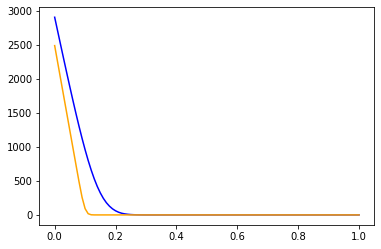

In [228]:
plt.plot(probability, avg_infections1, color='blue')
plt.plot(probability, avg_infections2, color='orange')

In [229]:
print(probability[np.where(avg_infections1==0)][0],probability[np.where(avg_infections1==0)][-1])
print(probability[np.where(avg_infections2==0)][0],probability[np.where(avg_infections2==0)][-1])

0.34 1.0
0.14 1.0


For group 1, the maximum and minnimum p values when the infection count = 0 is 1.0 and 0.34, respectively.

For group 1, the maximum and minnimum p values when the infection count = 0 is 1.0 and 0.34, respectively.
